# Evolution of Einstein's equations

# Initial data , setting length of the domain and discretization


# Parameters

In [565]:
m=1
p = 0.01#0.4
q = 1#1.0#0.1#0.1#0.01#0.9#0.01#0.5 #Pure SF is q=0
run = 1

1

Choose your grid

In [566]:
global compactified=true
global loggrid=false
global bisection=false
global zeroformat=false
global twod=true

global source=false

false

In [567]:
function compactify(r)
    x=r/(1+r)
    return x
end

compactify (generic function with 1 method)

In [675]:
using Quadmath, Printf

res=m;
N=2.0^m*400.0/2.0

if compactified==true
    Xf=1.0
else
    Xf=2.0
end

dx=Xf/N
if loggrid==false
    dt=0.5*round(dx,digits=10)
else
    dt=0.1*round(dx,digits=10)
end
Nt=N
Tf=Nt*dt;

In [676]:
print(N)

400.0

In [677]:
global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/TMYangMills/DATA"

"/home/rita13santos/Desktop/MSc Thesis/Git/TMYangMills/DATA"

# Grid

In [720]:
using Printf
include("./TMYangMillsTHREE.jl");

In [721]:
ori=0.0#Float128(0.0)#0.0;
initX1 = nothing
N=int(N)
initX1=range(ori, stop=Xf, step=dx);
initX = range(round(ori-3.0*dx,digits=10), stop=Xf+3.0*dx, step=dx)

L=length(initX);
println("step size is  ", dx)
println("the time step is ", dt)

if loggrid==true
    global originalX=initX
    xtilde=gridfunc(initX1)
    initX1=xtilde
    initX=collect(initX)
    initX[4:L-3]=xtilde
end;

step size is  0.0025
the time step is 0.0002456910267982655


# Initial data of m β Ψ and Ψ,x

In [794]:
using Dierckx


####

initm=zeros(L)
initbeta=zeros(L)
initxi=zeros(L)
initderxi=zeros(L)

state_array=[initm initbeta initxi initderxi];

#WBAR,R
A=0.15
r0=0.3
sigma=0.1

initderxi[4:L-3] = init_derpsi(initX1,r0,sigma,A)

state_array[:,4] = initderxi
state_array=ghost(state_array)

####
#XI FROM XI,X

derxi_func = Spline1D(initX[4:L-3], state_array[4:L-3,4],  k=4);

funcs=[derxi_func];

In [795]:
y0=[0.0 0.0 0.0]

if twod==true
        state_array[4:L-3,1:3] = twod_n_rk4wrapper(RHS,y0,initX[4:L-3],0,funcs,state_array[:,:]);
    else
        state_array[4:L-3,1:3] = n_rk4wrapper(RHS,y0,initX[4:L-3],0,funcs,state_array[:,:]);
end

#state_array = ghost(state_array);

401×3 Matrix{Float64}:
 0.0          0.0          0.0
 2.04032e-11  3.80715e-9   5.41796e-8
 7.83987e-11  1.08555e-8   1.26081e-7
 1.66927e-10  1.76687e-8   2.19942e-7
 3.00606e-10  2.55647e-8   3.40873e-7
 5.01137e-10  3.53623e-8   4.95016e-7
 8.003e-10    4.79343e-8   6.89731e-7
 1.24429e-9   6.43652e-8   9.33819e-7
 1.89987e-9   8.60677e-8   1.23777e-6
 2.86301e-9   1.14909e-7   1.61406e-6
 4.27098e-9   1.5337e-7    2.07749e-6
 6.31917e-9   2.04744e-7   2.64558e-6
 9.28442e-9   2.73404e-7   3.33903e-6
 ⋮                        
 0.184659     0.442991    -1.1754e-9
 0.184659     0.442991    -1.1754e-9
 0.184659     0.442991    -1.1754e-9
 0.184659     0.442991    -1.1754e-9
 0.184659     0.442991    -1.1754e-9
 0.184659     0.442991    -1.1754e-9
 0.184659     0.442991    -1.1754e-9
 0.184659     0.442991    -1.1754e-9
 0.184659     0.442991    -1.1754e-9
 0.184659     0.442991    -1.1754e-9
 0.184659     0.442991    -1.1754e-9
 0.184659     0.442991    -1.1754e-9

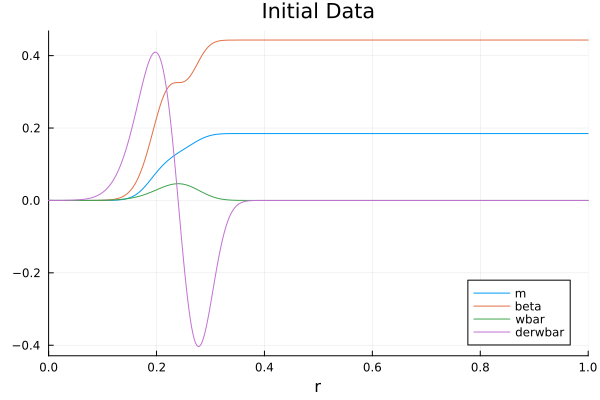

In [796]:
using Plots #showing initial data and the initial status of the horizon finder
plot((initX[4:L-3]), state_array[4:L-3,1:4], xaxis="r",title="Initial Data", labels=["m" "beta" "wbar" "derwbar"],xlim=[0,1])

In [797]:
aux=exp.(2 .* state_array[:,2]) .* (1 .- 2 .* state_array[:,1] .* (1 .- initX) ./ initX) .* (1 .- initX) .^ 2  .*  state_array[:,4]
aux[4]=state_array[4,4]
a=Der([state_array aux],4,5,initX)

0.0022060877772893043

In [798]:
function compactify(r)
    return r/(1+r)
end
function uncompactify(x)
    return x/(1-x)
end;

# Defining the initial state array for the evolution m β Ψ and Ψ,x

In [799]:
using CSV, Tables
#CSV.write(dir*"/res$res/time_step0.csv", Tables.table(state_array), writeheader=false)

global files=["m", "beta", "xi", "derxi"]

print_muninn(files, 0, state_array[:,1:4],res,"w", initX)

In [800]:
time=0.0
criticality=0.0
explode=0.0
evol_stats = [criticality A sigma r0 time explode run]
global monitor_ratio = zeros(L);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=true, header=["criticality", "A", "sigma", "r0", "time", "explode", "run"])

In [801]:
ginit=speed(initX,state_array[:,1],state_array[:,2])
println(update_dt(initX,state_array[:,1],state_array[:,2],dx,ginit)/dt)

0.9999999932586564


In [802]:
using Base.Threads
Threads.nthreads()

4

In [803]:
monitor_ratio[5:L-4] = 2 .* state_array[5:L-4,1] ./ initX[5:L-4] .* (1 .- initX[5:L-4]);
maximum(monitor_ratio)

0.8629036032753913

In [804]:
dt=0.002/2^(m-1)

0.002

 ## Time evolution

fixed grid

In [805]:
finaltime=1.5
evol_stats, T_interp = timeevolution(state_array,finaltime,run);
#CSV.write(dir*"/timearray$res.csv", Tables.table(T_interp), writeheader=false);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=false);



iteration 50 dt is 0.0005025094063616413, t=0.025125470326104134 speed is 0.49750312498644517, dx/dt=4.975031249864451


iteration 100 dt is 0.0005025094063932793, t=0.050250940644813634 speed is 0.4975031249551224, dx/dt=4.975031249551224


iteration 150 dt is 0.0005025094065132435, t=0.07537641096691215 speed is 0.49750312483635334, dx/dt=4.975031248363534


iteration 200 dt is 0.0005025094069276212, t=0.10050188130111323 speed is 0.4975031244261039, dx/dt=4.9750312442610385


iteration 250 dt is 0.0005025094082426304, t=0.12562735167503838 speed is 0.49750312312419565, dx/dt=4.975031231241956


iteration 300 dt is 0.0005025094120602664, t=0.15075282216850563 speed is 0.4975031193445931, dx/dt=4.975031193445931


iteration 350 dt is 0.0005025094221556039, t=0.17587829299045735 speed is 0.49750310934983144, dx/dt=4.9750310934983135


iteration 400 dt is 0.0005025094463058366, t=0.2010037646321901 speed is 0.49750308544019956, dx/dt=4.975030854401996


iteration 450 dt is 0.000502509